In [26]:
import cmath
import functools
import math
import operator

import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
def exp1(z: complex, n: int = 10) -> complex:
    """極限値による定義"""

    N = 10 ** n
    return pow(1 + z / N, N)

In [21]:
def _prod(iterable):
    return functools.reduce(operator.mul, iterable, 1)


def exp2(z: complex, n: int = 30) -> complex:
    """無限級数による定義"""

    return sum(pow(z, i) / _prod(range(1, i + 1)) for i in range(n))

In [4]:
def exp3(z: complex) -> complex:
    """実関数による定義"""
    x, y = z.real, z.imag
    i = 0 + 1j
    return math.exp(x) * (math.cos(y) + math.sin(y) * i)

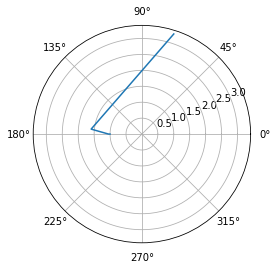

In [47]:
z = cmath.pi * (0 + 1j)

theta = [cmath.phase(exp1(z, n)) for n in range(10)]
r = [abs(exp1(z, n)) for n in range(10)]



plt.polar(theta, r)

In [22]:
z = cmath.pi * (0 + 1j)
for x in range(10):
    print(exp1(z, x))

(1+3.141592653589793j)
(-1.59336232527449+0.15606362987273692j)
(-1.0505597866729242+0.001085156102081264j)
(-1.004946973864266+1.0386493134192281e-05j)
(-1.0004936019770099+1.0340526558763341e-07j)
(-1.0000493492321847+1.0335941559643974e-09j)
(-1.0000049347314757+1.0335461647996648e-11j)
(-1.0000004929391444+1.0315121221237449e-13j)
(-1.0000000444089219+1.4547323740680167e-15j)
(-1+1.2246467991473532e-16j)


In [23]:
z = cmath.pi * (0 + 1j)
for x in range(10):
    print(exp2(z, x))

0
(1+0j)
(1+3.141592653589793j)
(-3.934802200544679+3.141592653589793j)
(-3.934802200544679-2.0261201264601763j)
(0.1239099258720886-2.0261201264601763j)
(0.1239099258720886+0.5240439134171688j)
(-1.2113528429825007+0.5240439134171688j)
(-1.2113528429825007-0.07522061590362306j)
(-0.9760222126236076-0.07522061590362306j)


In [13]:
z1 = exp1(cmath.pi * (0 + 1j))
z1

(-1.0004936019770099+1.0340526558763341e-07j)

In [19]:
z2 = exp2(cmath.pi * (0 + 1j))
z2

(-1.0000000000000002+3.461777852236587e-16j)

In [7]:
z3 = exp3(cmath.pi * (0 + 1j))
z3

(-1+1.2246467991473532e-16j)

In [8]:
z0 = cmath.exp(cmath.pi * (0 + 1j))
z0

(-1+1.2246467991473532e-16j)

In [14]:
cmath.isclose(z1, z0)

False

In [17]:
cmath.isclose(z2, z0)

True

In [11]:
cmath.isclose(z3, z0)

True